# Introduction to Pandas

Pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/amourtu1934/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


With Pandas, it is easy to store, visualize, and perform calculations on our data. With only a few lines of code, we can modify our data and present it in an easily-understandable way. Here, we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform caclulations to turn them into prices and plot them, all only using a few lines of code.

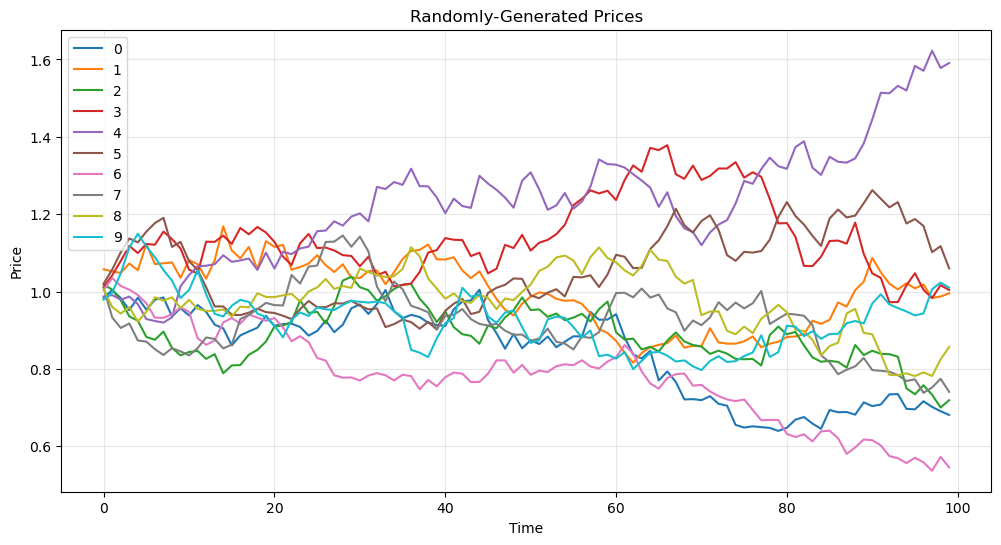

In [11]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices  = returns.cumprod()
prices.plot(figsize=(12, 6))
plt.title("Randomly-Generated Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.legend(loc=0)

## Pandas Data Structures

### `Series`

A Pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [8]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Each `Series` has a name. We can have the series a name as a parameter or we can define it aftwards by directly accessing the name attribute. In this case, we have given our time series no name, so the name attribute should be empty.

In [12]:
print(s.name)

None


This name can be directly modified with no repercussions.

In [13]:
s.name = "Toy Series"
print(s.name)

Toy Series


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at 0, as in the case of our "Toy Series".

In [14]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


Pandas has a built-in function specifically for create date indices, `date_range()`. We use the function here to create a new index for `s`.

In [15]:
new_index = pd.date_range(start="2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [16]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to acess the index of the Series.

In [17]:
print(f"FIrst element of the series: {s.iloc[0]}")
print(f"Last element of the series: {s.iloc[-1]}")

FIrst element of the series: 1.0
Last element of the series: 5.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [18]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [20]:
start = 0
end = len(s) - 1
step = 1
s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [21]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

This returns a slice of the series that start from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size 1).

In [22]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

We can also access a series by using the values of its index. Since we index `s` with a collection of dates (`Timestamp` objects), we can look at the value contained in `s` for a particular date.

In [23]:
s.loc["2016-01-01"]

1.0

Or even for a range of dates!

In [24]:
s.loc["2016-01-02":"2016-01-04"]

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we *can* just use the brackets `[]` to access elements, but this is not the best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on the context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, we can filter `Series` using boolean arrays. `Series` are compatible with our standard comparators. Once compared with whatever condition we like, we get back yet another `Series`, this time filled with boolean value.

In [25]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


We can pass this `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [27]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [29]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes, we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [124]:
import pandas as pd
import yfinance as yf

_FIELD_MAP = {
    "price": "Close",        # Quantopian "price" ~= daily close
    "open_price": "Open",
    "high": "High",
    "low": "Low",
    "close_price": "Close",
    "volume": "Volume",
    "adj_close": "Adj Close",
}

def get_pricing(symbol, start_date, end_date, fields="price", adjusted=False):
    if isinstance(symbol, str):
        tickers = [symbol]
    else:
        tickers = list(symbol)

    col = _FIELD_MAP.get(fields, fields)

    df = yf.download(
        tickers=tickers,
        start=start_date,
        end=end_date,
        interval="1d",
        auto_adjust=adjusted,
        actions=False,
        progress=False,
        group_by="ticker",
    )

    # Case 1: MultiIndex columns: (ticker, field)
    if isinstance(df.columns, pd.MultiIndex):
        # return Series for single ticker, DataFrame for multi tickers
        if len(tickers) == 1:
            t = tickers[0]
            if (t, col) not in df.columns:
                raise KeyError(f"Missing {(t, col)}. Available: {list(df.columns)}")
            out = df[(t, col)].copy()
            out.name = t
            return out
        else:
            out = {}
            for t in tickers:
                if (t, col) not in df.columns:
                    raise KeyError(f"Missing {(t, col)}. Available: {list(df.columns)[:10]} ...")
                out[t] = df[(t, col)]
            return pd.DataFrame(out)

    # Case 2: Flat columns: "Open", "High", ...
    else:
        if col not in df.columns:
            raise KeyError(f"Field '{fields}' mapped to '{col}' not found. Available: {list(df.columns)}")
        if len(tickers) == 1:
            out = df[col].copy()
            out.name = tickers[0]
            return out
        else:
            # In flat-column case with multiple tickers, yfinance usually returns MultiIndex,
            # but handle defensively anyway.
            return df[col].copy()

In [125]:
symbol  = "CMG"
start   = "2012-01-01"
end     = "2016-01-01"

prices = get_pricing(symbol, start_date=start, end_date=end, fields="price", adjusted=False)

We can display the first few elements of our series by using the `head()` method and specifying the number of elements we want. The analogous method for the last few elements is `tail()`.

In [42]:
print("\n", type(prices))
prices.head(10)


 <class 'pandas.core.series.Series'>


Date
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-09    6.7948
2012-01-10    6.8224
2012-01-11    6.9520
2012-01-12    6.9524
2012-01-13    7.0924
2012-01-17    7.0676
Name: CMG, dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [43]:
print(f"Old name: {prices.name}")
prices.name = symbol
print(f"New name: {prices.name}")

Old name: CMG
New name: CMG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [44]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular, it has an associated frequency (`freq`), which indicates whether the data is daily vs monthly vs some other period. We can modify this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market day. Let's up-sample from this daily data to monthly dat using the `resample()` method.

In [53]:
monthly_prices = prices.resample("M").last()
monthly_prices.head(10)

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_72134/2081083901.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = prices.resample("M").last()


Date
2012-01-31    7.3458
2012-02-29    7.8044
2012-03-31    8.3600
2012-04-30    8.2830
2012-05-31    8.2614
2012-06-30    7.5990
2012-07-31    5.8466
2012-08-31    5.7728
2012-09-30    6.3508
2012-10-31    5.0906
Freq: ME, Name: CMG, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [54]:
monthly_prices_med = prices.resample("M").median()
monthly_prices_med.head(10)

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_72134/705192223.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices_med = prices.resample("M").median()


Date
2012-01-31    7.1101
2012-02-29    7.5639
2012-03-31    8.1799
2012-04-30    8.4167
2012-05-31    8.1048
2012-06-30    8.0490
2012-07-31    7.6094
2012-08-31    5.9078
2012-09-30    6.6562
2012-10-31    5.7312
Freq: ME, Name: CMG, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here, we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [55]:
def custom_resampler(array_like):
    """Return the first value of the period"""
    return array_like[0]

first_of_month_prices = prices.resample("M").apply(custom_resampler)
first_of_month_prices.head(10)

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_72134/2915107797.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  first_of_month_prices = prices.resample("M").apply(custom_resampler)
/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_72134/2915107797.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return array_like[0]


Date
2012-01-31    6.8254
2012-02-29    7.4082
2012-03-31    7.8820
2012-04-30    8.3680
2012-05-31    8.3978
2012-06-30    7.9428
2012-07-31    7.6692
2012-08-31    5.6134
2012-09-30    5.7198
2012-10-31    6.3226
Freq: ME, Name: CMG, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be "US/Eastern". In this case, we use the `tz_convert()` method, since the time is already localized.

In [57]:
eastern_prices = prices.tz_localize("US/Eastern")
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    6.8254
2012-01-04 00:00:00-05:00    6.9750
2012-01-05 00:00:00-05:00    7.0096
2012-01-06 00:00:00-05:00    6.9790
2012-01-09 00:00:00-05:00    6.7948
2012-01-10 00:00:00-05:00    6.8224
2012-01-11 00:00:00-05:00    6.9520
2012-01-12 00:00:00-05:00    6.9524
2012-01-13 00:00:00-05:00    7.0924
2012-01-17 00:00:00-05:00    7.0676
Name: CMG, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities. First, let's create a new `DatetimeIndex` that contains all that we want.

In [60]:
calendar_dates = pd.date_range(start=start, end=end, freq="D")
print(calendar_dates)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=1462, freq='D')


Now, let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [61]:
calendar_prices = prices.reindex(calendar_dates, method="ffill")
calendar_prices.head(10)

2012-01-01       NaN
2012-01-02       NaN
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-07    6.9790
2012-01-08    6.9790
2012-01-09    6.7948
2012-01-10    6.8224
Freq: D, Name: CMG, dtype: float64

Notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday, and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them too. We have two primary means of coping with missing data. The first of these if filling in the missing data with `fillna()`. For example, say that we want to fill in the missing days with the mean prices of all days.

In [62]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01    10.021364
2012-01-02    10.021364
2012-01-03     6.825400
2012-01-04     6.975000
2012-01-05     7.009600
2012-01-06     6.979000
2012-01-07     6.979000
2012-01-08     6.979000
2012-01-09     6.794800
2012-01-10     6.822400
Freq: D, Name: CMG, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [63]:
bfilled_prices = calendar_prices.fillna(method="bfill")
bfilled_prices.head(10)

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_72134/944573988.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfilled_prices = calendar_prices.fillna(method="bfill")


2012-01-01    6.8254
2012-01-02    6.8254
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-07    6.9790
2012-01-08    6.9790
2012-01-09    6.7948
2012-01-10    6.8224
Freq: D, Name: CMG, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, is tomorrow's price. This also makes no sense. These two options are both examples of **look-ahead bias**, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [64]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-07    6.9790
2012-01-08    6.9790
2012-01-09    6.7948
2012-01-10    6.8224
2012-01-11    6.9520
2012-01-12    6.9524
Freq: D, Name: CMG, dtype: float64

Now, our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structure.

#### Time Series Analysis with Pandas

Let's do some basic time series analysis on our original prices. Each Pandas `Series` has a built-in plotting method.

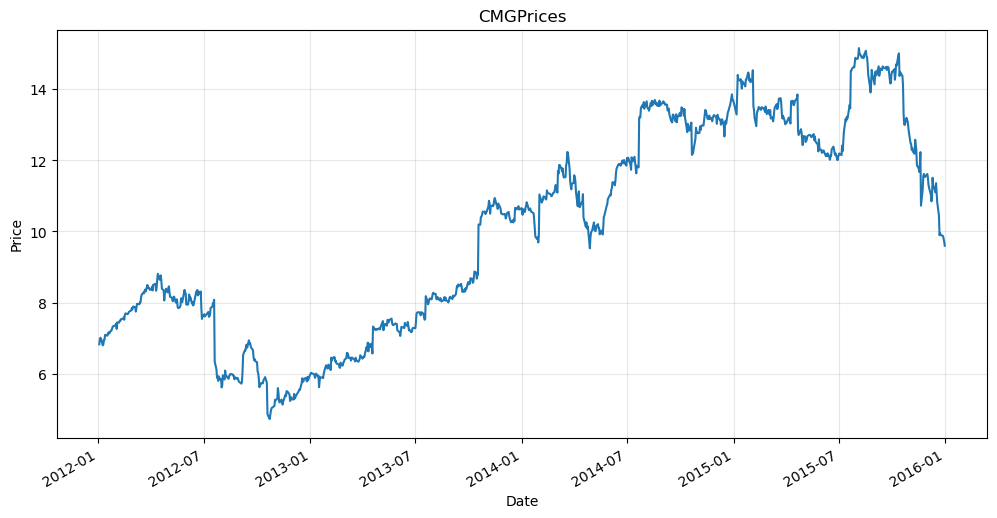

In [66]:
prices.plot(figsize=(12, 6))
plt.title(symbol + "Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(alpha=0.3)

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [71]:
print(f"Mean: {prices.mean()}")
print(f"Standard Deviation: {prices.std()}")

Mean: 10.032733014753278
Standard Deviation: 2.9337747441407167


In [68]:
print("Summary Statistics:")
print(prices.describe())

Summary Statistics:
count    1006.000000
mean       10.032733
std         2.933775
min         4.724800
25%         7.431100
50%        10.425400
75%        12.936700
max        15.155400
Name: CMG, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [72]:
modified_prices = prices * 2 - 10
modified_prices.head(10)

Date
2012-01-03    3.6508
2012-01-04    3.9500
2012-01-05    4.0192
2012-01-06    3.9580
2012-01-09    3.5896
2012-01-10    3.6448
2012-01-11    3.9040
2012-01-12    3.9048
2012-01-13    4.1848
2012-01-17    4.1352
Name: CMG, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. Pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [73]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(10)

Date
2012-01-03    34.602421
2012-01-04    16.462057
2012-01-05     6.790416
2012-01-06    57.717206
2012-01-09    10.888055
2012-01-10    64.227331
2012-01-11     7.447462
2012-01-12    20.876791
2012-01-13    40.366405
2012-01-17    46.763837
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [75]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(10)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
2012-01-10 00:00:00   NaN
2012-01-11 00:00:00   NaN
2012-01-12 00:00:00   NaN
2012-01-13 00:00:00   NaN
2012-01-17 00:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [76]:
add_returns  = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

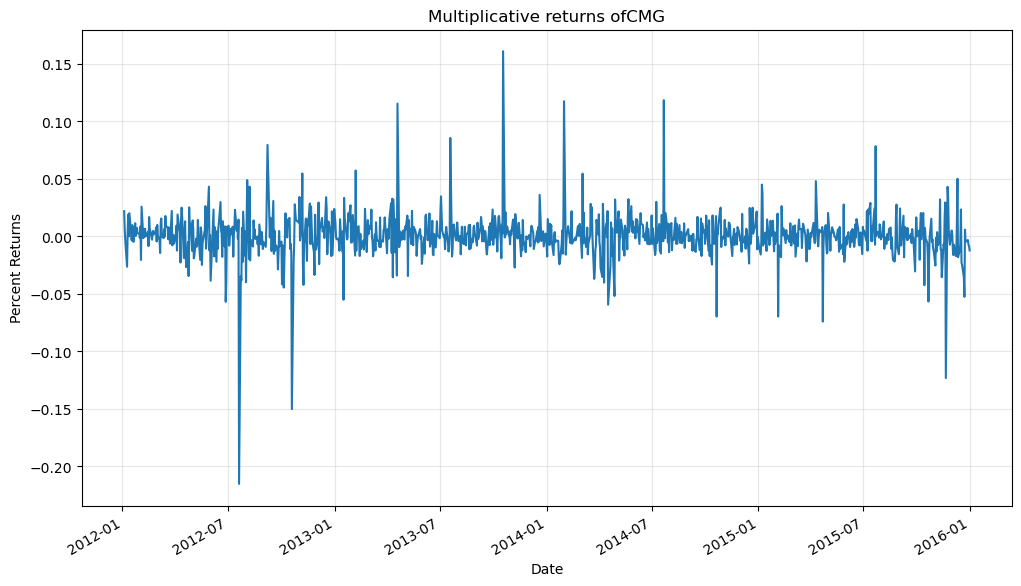

In [79]:
mult_returns.plot(figsize=(12, 7))
plt.title("Multiplicative returns of" + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
plt.grid(alpha=0.3)

Pandas has convenient functions for calculative rolling means and standard deviations as well.

In [82]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.name = "30-Day Rolling Mean"

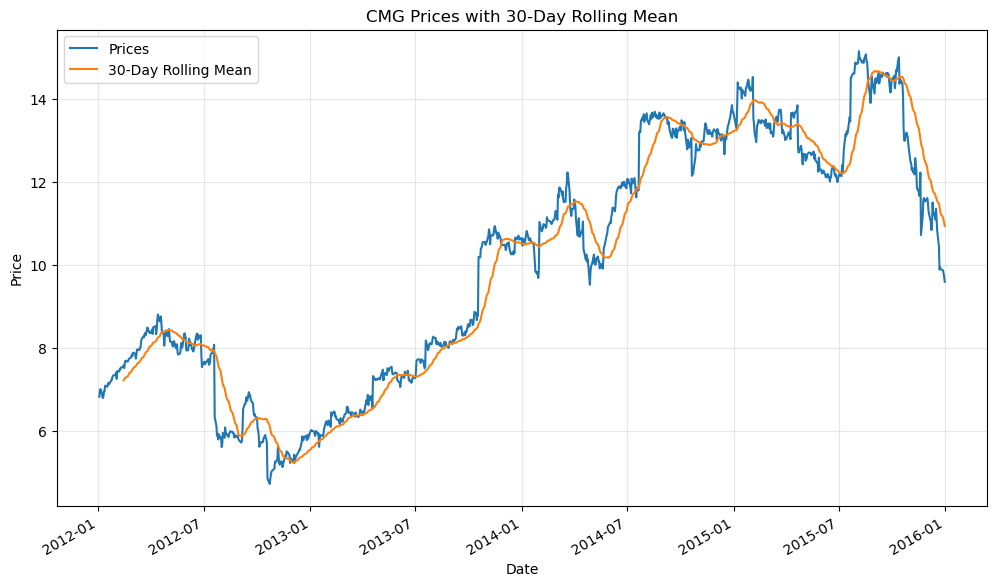

In [84]:
plt.figure(figsize=(12, 7))
prices.plot(label="Prices")
rolling_mean.plot(label="30-Day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(symbol + " Prices with 30-Day Rolling Mean")
plt.legend()
plt.grid(alpha=0.3)

In [87]:
rolling_std = prices.rolling(window=30).std()
rolling_std.name = "30-Day Rolling Volatility"

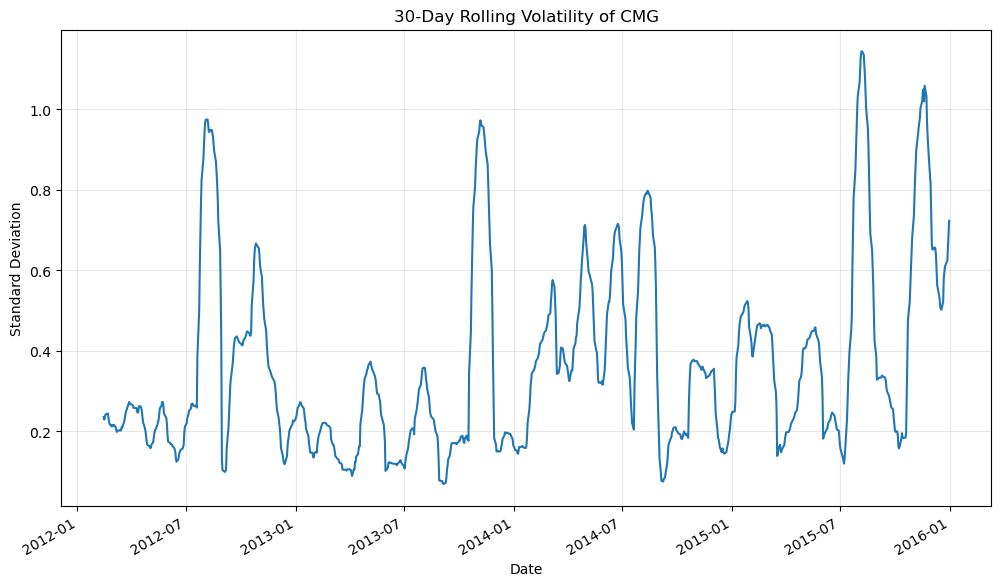

In [88]:
rolling_std.plot(figsize=(12, 7))
plt.title("30-Day Rolling Volatility of " + symbol)
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.grid(alpha=0.3)

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [89]:
print(np.median(mult_returns))

0.0002359792100385949


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [90]:
print(mult_returns.median())

0.0002359792100385949


In every case, using the built-in Pandas method will be better than using the NumPy function on a Pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. Pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [95]:
dict_data = {
    "a": [1, 2, 3, 4, 5],
    "b": ["L", "K", "J", "M", "Z"],
    "c": np.random.normal(0, 1, 5)
}
dict_data

{'a': [1, 2, 3, 4, 5],
 'b': ['L', 'K', 'J', 'M', 'Z'],
 'c': array([-0.04794475, -0.02618807, -1.28603091,  1.41555375,  0.98855002])}

Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [98]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range("2016-01-01", periods=5))
frame_data

,a,b,c
2016-01-01,1,L,-0.047945
2016-01-02,2,K,-0.026188
2016-01-03,3,J,-1.286031
2016-01-04,4,M,1.415554
2016-01-05,5,Z,0.988550


As mentioned above, we can combine `Series` into `DataFrames`. Concatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index.

In [100]:
s_1 = pd.Series([2, 4, 6, 8, 10], name="Evens")
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
numbers

,Evens,Odds
0,2,1
1,4,3
2,6,5
3,8,7
4,10,9


Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [101]:
numbers.columns = ["Shmevens", "Smhodds"]
numbers

,Shmevens,Smhodds
0,2,1
1,4,3
2,6,5
3,8,7
4,10,9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [103]:
print(numbers.index)
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
numbers

RangeIndex(start=0, stop=5, step=1)


,Shmevens,Smhodds
2016-01-01,2,1
2016-01-02,4,3
2016-01-03,6,5
2016-01-04,8,7
2016-01-05,10,9


Separate frm the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [104]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

This returns a NumPy array.

In [105]:
type(numbers.values)

numpy.ndarray

#### Accessing `DataFrame` Elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [130]:
symbol = ["CMG", "MCD", "SHAK", "AMZN"]
start  = "2012-01-01"
end    = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price", adjusted=False)
if isinstance(symbol, list):
    # if symbol is a list of objects with .symbol, extract that
    # otherwise use the list items directly
    if len(symbol) and hasattr(symbol[0], "symbol"):
        prices.columns = [s.symbol for s in symbol]
    else:
        prices.columns = list(symbol)
else:
    prices.name = symbol

Here, we directly access the `CMG` column. Note that this style of access will only work if our column name has no spaces or unfriendly characters in it.

In [131]:
prices.CMG.head(10)

Date
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-09    6.7948
2012-01-10    6.8224
2012-01-11    6.9520
2012-01-12    6.9524
2012-01-13    7.0924
2012-01-17    7.0676
Name: CMG, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [112]:
prices.loc[:, "CMG"].head(10)

Date
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-09    6.7948
2012-01-10    6.8224
2012-01-11    6.9520
2012-01-12    6.9524
2012-01-13    7.0924
2012-01-17    7.0676
Name: CMG, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [113]:
print(type(prices.CMG))
print(type(prices.loc[:, "CMG"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [114]:
prices.loc[:, ["CMG", "MCD"]].head(10)

,CMG,MCD
Date,,
2012-01-03,6.8254,98.839996
2012-01-04,6.9750,99.389999
2012-01-05,7.0096,99.830002
2012-01-06,6.9790,100.599998
2012-01-09,6.7948,99.639999
2012-01-10,6.8224,99.699997
2012-01-11,6.9520,99.930000
2012-01-12,6.9524,100.570000
2012-01-13,7.0924,100.349998


We can also simply access the `DataFrame` by index value using `loc`, as with `Series`.

In [115]:
prices.loc["2015-12-15":"2015-12-22"]

,CMG,MCD,SHAK,AMZN
Date,,,,
2015-12-15,11.0972,116.930000,41.580002,32.931999
2015-12-16,11.3566,117.839996,40.169998,33.788502
2015-12-17,11.0978,117.500000,38.540001,33.532501
2015-12-18,10.8216,116.660004,39.750000,33.207001
2015-12-21,10.4402,117.690002,38.189999,33.225498
2015-12-22,9.8922,117.720001,39.750000,33.157501


This plays nicely with lists of columns, too.

In [116]:
prices.loc["2015-12-15":"2015-12-22", ["CMG", "MCD"]]

,CMG,MCD
Date,,
2015-12-15,11.0972,116.930000
2015-12-16,11.3566,117.839996
2015-12-17,11.0978,117.500000
2015-12-18,10.8216,116.660004
2015-12-21,10.4402,117.690002
2015-12-22,9.8922,117.720001


Using `iloc[]` also works similarly, allowing us to access parts of the `DataFrame` by integer index.

In [117]:
prices.iloc[0:2, 1]

Date
2012-01-03    98.839996
2012-01-04    99.389999
Name: MCD, dtype: float64

In [118]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[range(1, 100, 2), [0, 3]].head(20)

,CMG,AMZN
Date,,
2012-01-04,6.9750,8.8755
2012-01-06,6.9790,9.1305
2012-01-10,6.8224,8.9670
2012-01-12,6.9524,8.7965
2012-01-17,7.0676,9.0830
2012-01-19,7.1618,9.7225
2012-01-23,7.2092,9.3045
2012-01-25,7.2628,9.3900
2012-01-27,7.3352,9.7685


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [121]:
prices.loc[prices.MCD > prices.AMZN].head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,6.8254,98.839996,NaN,8.9515
2012-01-04,6.9750,99.389999,NaN,8.8755
2012-01-05,7.0096,99.830002,NaN,8.8805
2012-01-06,6.9790,100.599998,NaN,9.1305
2012-01-09,6.7948,99.639999,NaN,8.9280
2012-01-10,6.8224,99.699997,NaN,8.9670
2012-01-11,6.9520,99.930000,NaN,8.9450
2012-01-12,6.9524,100.570000,NaN,8.7965
2012-01-13,7.0924,100.349998,NaN,8.9210


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [122]:
prices.loc[(prices.MCD > prices.AMZN) & ~prices.SHAK.isnull()].head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2015-01-30,14.1968,92.440002,45.900002,17.726500
2015-02-02,14.2510,92.510002,43.990002,18.223499
2015-02-03,14.5326,93.919998,44.980000,18.177500
2015-02-04,13.5200,94.050003,41.320000,18.237499
2015-02-05,13.4182,94.339996,42.639999,18.694500
2015-02-06,13.1984,93.989998,41.959999,18.714001
2015-02-09,12.9602,92.720001,41.500000,18.528000
2015-02-10,13.3006,94.019997,41.500000,18.650000
2015-02-11,13.3928,94.209999,41.500000,18.757000


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good we you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [132]:
s_1 = get_pricing("TSLA", start_date=start, end_date=end, fields="price", adjusted=False)
prices.loc[:, "TSLA"] = s_1
prices.head(10)

,CMG,MCD,SHAK,AMZN,TSLA
Date,,,,,
2012-01-03,6.8254,98.839996,NaN,8.9515,1.872000
2012-01-04,6.9750,99.389999,NaN,8.8755,1.847333
2012-01-05,7.0096,99.830002,NaN,8.8805,1.808000
2012-01-06,6.9790,100.599998,NaN,9.1305,1.794000
2012-01-09,6.7948,99.639999,NaN,8.9280,1.816667
2012-01-10,6.8224,99.699997,NaN,8.9670,1.841333
2012-01-11,6.9520,99.930000,NaN,8.9450,1.882000
2012-01-12,6.9524,100.570000,NaN,8.7965,1.883333
2012-01-13,7.0924,100.349998,NaN,8.9210,1.519333


It is also just as easy to remove a column.

In [133]:
prices = prices.drop("TSLA", axis=1)
prices.head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,6.8254,98.839996,NaN,8.9515
2012-01-04,6.9750,99.389999,NaN,8.8755
2012-01-05,7.0096,99.830002,NaN,8.8805
2012-01-06,6.9790,100.599998,NaN,9.1305
2012-01-09,6.7948,99.639999,NaN,8.9280
2012-01-10,6.8224,99.699997,NaN,8.9670
2012-01-11,6.9520,99.930000,NaN,8.9450
2012-01-12,6.9524,100.570000,NaN,8.7965
2012-01-13,7.0924,100.349998,NaN,8.9210


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [135]:
df_1 = get_pricing(["SPY", "AMZN"], start_date=start, end_date=end, fields="price", adjusted=False)
df_2 = get_pricing(["MSFT", "AAPL", "GOOG"], start_date=start, end_date=end, fields="price", adjusted=False)
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head(10)

,SPY,AMZN,MSFT,AAPL,GOOG
Date,,,,,
2012-01-03,127.500000,8.9515,26.770000,14.686786,16.573130
2012-01-04,127.699997,8.8755,27.400000,14.765714,16.644611
2012-01-05,128.039993,8.8805,27.680000,14.929643,16.413727
2012-01-06,127.709999,9.1305,28.110001,15.085714,16.189817
2012-01-09,128.020004,8.9280,27.740000,15.061786,15.503389
2012-01-10,129.130005,8.9670,27.840000,15.115714,15.520326
2012-01-11,129.199997,8.9450,27.719999,15.091071,15.590563
2012-01-12,129.509995,8.7965,28.000000,15.049643,15.682219
2012-01-13,128.839996,8.9210,28.250000,14.993214,15.566403


#### Missing Data

Bringing real-life data into a `DataFrame` brings us the same problems that we had within it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [136]:
filled0_prices = prices.fillna(0)
filled0_prices.head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,6.8254,98.839996,0.0,8.9515
2012-01-04,6.9750,99.389999,0.0,8.8755
2012-01-05,7.0096,99.830002,0.0,8.8805
2012-01-06,6.9790,100.599998,0.0,9.1305
2012-01-09,6.7948,99.639999,0.0,8.9280
2012-01-10,6.8224,99.699997,0.0,8.9670
2012-01-11,6.9520,99.930000,0.0,8.9450
2012-01-12,6.9524,100.570000,0.0,8.7965
2012-01-13,7.0924,100.349998,0.0,8.9210


In [137]:
bfilled_prices = prices.fillna(method="bfill")
bfilled_prices.head(10)

/var/folders/10/yh5g9ksn5fb_2pzdwtzd2tlh0000gn/T/ipykernel_72134/3958097373.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfilled_prices = prices.fillna(method="bfill")


,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,6.8254,98.839996,45.900002,8.9515
2012-01-04,6.9750,99.389999,45.900002,8.8755
2012-01-05,7.0096,99.830002,45.900002,8.8805
2012-01-06,6.9790,100.599998,45.900002,9.1305
2012-01-09,6.7948,99.639999,45.900002,8.9280
2012-01-10,6.8224,99.699997,45.900002,8.9670
2012-01-11,6.9520,99.930000,45.900002,8.9450
2012-01-12,6.9524,100.570000,45.900002,8.7965
2012-01-13,7.0924,100.349998,45.900002,8.9210


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [138]:
dropped_prices = prices.dropna()
dropped_prices.head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2015-01-30,14.1968,92.440002,45.900002,17.726500
2015-02-02,14.2510,92.510002,43.990002,18.223499
2015-02-03,14.5326,93.919998,44.980000,18.177500
2015-02-04,13.5200,94.050003,41.320000,18.237499
2015-02-05,13.4182,94.339996,42.639999,18.694500
2015-02-06,13.1984,93.989998,41.959999,18.714001
2015-02-09,12.9602,92.720001,41.500000,18.528000
2015-02-10,13.3006,94.019997,41.500000,18.650000
2015-02-11,13.3928,94.209999,41.500000,18.757000


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

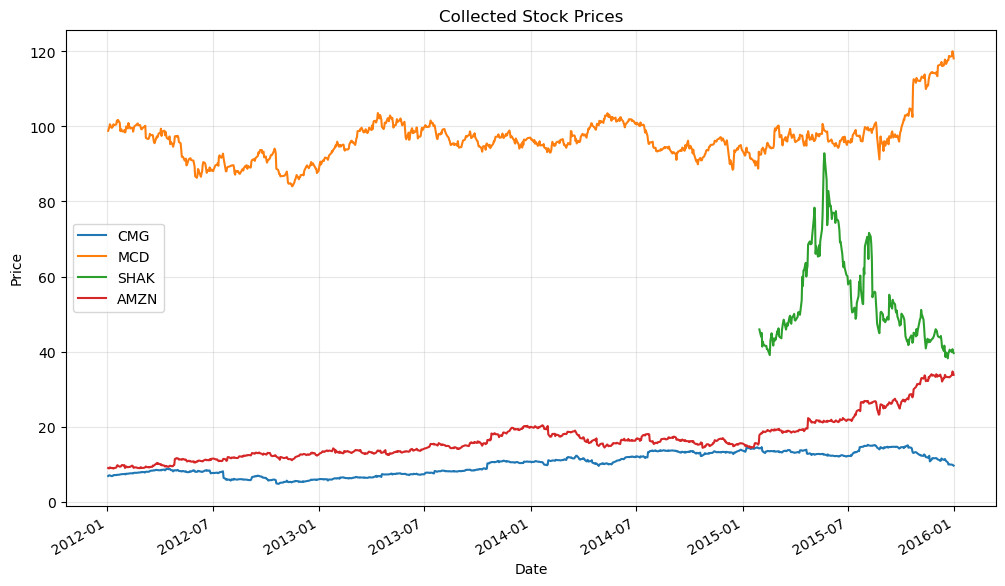

In [139]:
prices.plot(figsize=(12, 7))
plt.title("Collected Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(alpha=0.3)

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [140]:
prices.mean(axis=0) # Mean for each column

CMG     10.032733
MCD     96.621600
SHAK    53.575708
AMZN    16.623935
dtype: float64

As well as the standard deviation.

In [141]:
prices.std(axis=0)  # Standard deviation for each column

CMG      2.933775
MCD      5.714226
SHAK    11.968587
AMZN     5.614767
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [142]:
prices.describe()

,CMG,MCD,SHAK,AMZN
count,1006.000000,1006.000000,233.000000,1006.000000
mean,10.032733,96.621600,53.575708,16.623935
std,2.933775,5.714226,11.968587,5.614767
min,4.724800,84.050003,38.189999,8.796500
25%,7.431100,93.672499,44.119999,12.895750
50%,10.425400,96.290001,49.270000,15.502000
75%,12.936700,99.137499,61.669998,18.757000
max,15.155400,120.070000,92.860001,34.698502


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [143]:
(2 * prices - 50).head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,-36.3492,147.679993,NaN,-32.097000
2012-01-04,-36.0500,148.779999,NaN,-32.249001
2012-01-05,-35.9808,149.660004,NaN,-32.239000
2012-01-06,-36.0420,151.199997,NaN,-31.739000
2012-01-09,-36.4104,149.279999,NaN,-32.143999
2012-01-10,-36.3552,149.399994,NaN,-32.066000
2012-01-11,-36.0960,149.860001,NaN,-32.110001
2012-01-12,-36.0952,151.139999,NaN,-32.407000
2012-01-13,-35.8152,150.699997,NaN,-32.158001


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [144]:
mult_returns = prices.pct_change()[1:]
mult_returns.head(10)

,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-04,0.021918,0.005565,NaN,-0.008490
2012-01-05,0.004961,0.004427,NaN,0.000563
2012-01-06,-0.004365,0.007713,NaN,0.028152
2012-01-09,-0.026394,-0.009543,NaN,-0.022178
2012-01-10,0.004062,0.000602,NaN,0.004368
2012-01-11,0.018996,0.002307,NaN,-0.002453
2012-01-12,0.000058,0.006404,NaN,-0.016601
2012-01-13,0.020137,-0.002188,NaN,0.014153
2012-01-17,-0.003497,0.001993,NaN,0.018159


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

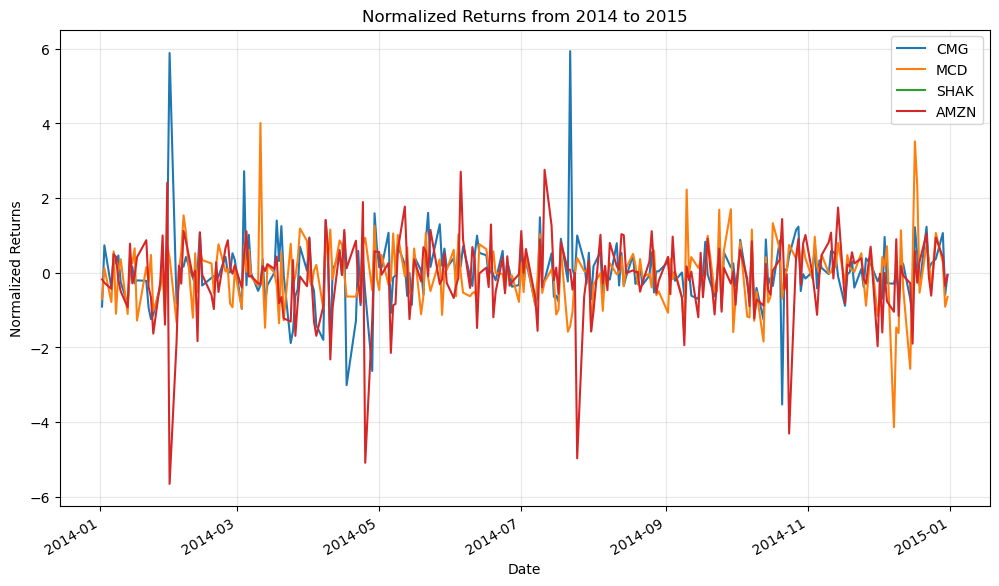

In [146]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot(figsize=(12, 7))
plt.title("Normalized Returns from 2014 to 2015")
plt.xlabel("Date")
plt.ylabel("Normalized Returns")
plt.grid(alpha=0.3)

Rolling means and standard deviations also work with `DataFrames`.

In [147]:
rolling_mean = prices.rolling(window=30).mean()
rolling_mean.columns = prices.columns

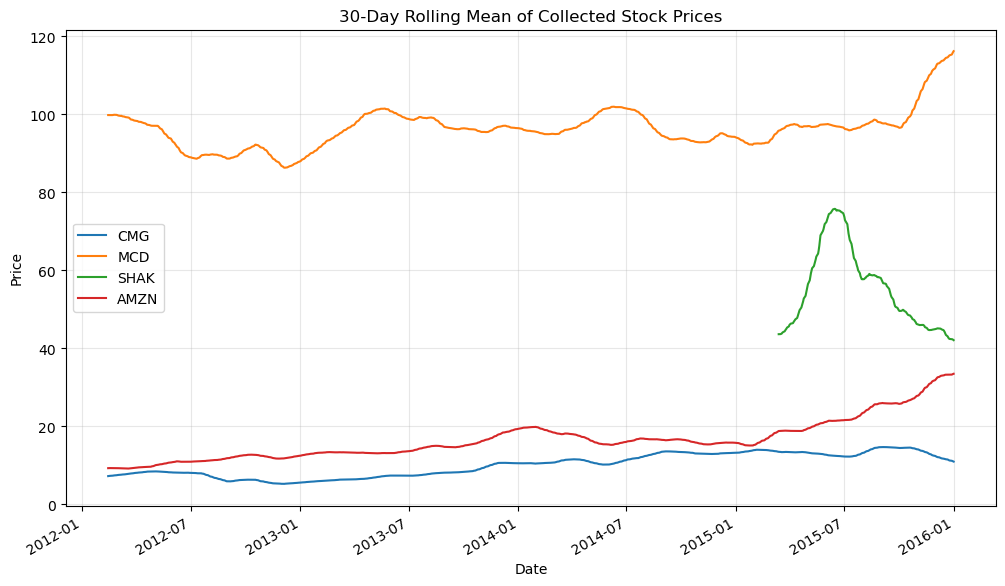

In [148]:
rolling_mean.plot(figsize=(12, 7))
plt.title("30-Day Rolling Mean of Collected Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(alpha=0.3)

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).